# Load input data for the two time series $S_1(t), S_2(t)$

In [1]:
import pandas as pd
import numpy as np
import pymc3 as pm

In [2]:
raw_data = pd.read_csv(r'data/input_data.csv')
raw_data['Date'] = pd.to_datetime(raw_data['Date'])
raw_data = raw_data.set_index('Date')

Compute $dS_1(t), dS_2(t)$ and join these to the original data

In [3]:
dS_data = raw_data.diff().shift(-1).rename(columns = {'seriesA':'dS_seriesA', 'seriesB':'dS_seriesB'})
data = pd.concat([raw_data, dS_data], axis = 1).dropna()
data.head()

,seriesA,seriesB,dS_seriesA,dS_seriesB
Date,,,,
2010-01-04,2308.419922,1132.989990,0.290039,3.530029
2010-01-05,2308.709961,1136.520020,-7.619873,0.619995
2010-01-06,2301.090088,1137.140015,-1.040039,4.549927
2010-01-07,2300.050049,1141.689941,17.119873,3.290039
2010-01-08,2317.169922,1144.979980,-4.760010,2.000000


# Estimation of $(\mu_1, \sigma_1)$
Since business days observations are used, we assume $dt=1/252$

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma_param, mu_param]
Sampling 2 chains: 100%|██████████████████████████████████████████████████| 101000/101000 [01:34<00:00, 1072.34draws/s]


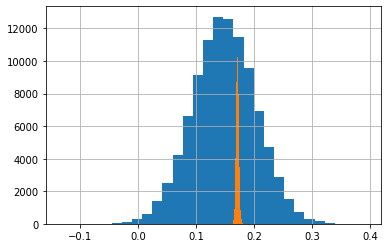

In [4]:
dt = 1/252
with pm.Model() as model:
    mu_param = pm.Uniform('mu_param', -0.5, 0.5)
    sigma_param = pm.Uniform('sigma_param', 0.0001, 0.3)
    
    dS = pm.Normal('dS', mu = (data['seriesA'].values*mu_param)*dt, sigma =  data['seriesA'].values*sigma_param*np.sqrt(dt), 
                  observed = data['dS_seriesA'].values)
    trace = pm.sample(50000)

pd.Series(trace['mu_param']).hist(bins = 30, label = 'estimated $\mu_1$')
pd.Series(trace['sigma_param']).hist(bins = 30, label = 'estimated $\sigma_1$')

# Estimation of $(\mu_2, \sigma_2)$
Since business days observations are used, we assume $dt=1/252$

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma_param, mu_param]
Sampling 2 chains: 100%|██████████████████████████████████████████████████| 101000/101000 [01:34<00:00, 1069.55draws/s]


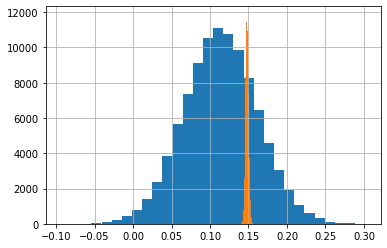

In [5]:
dt = 1/252
with pm.Model() as model:
    mu_param = pm.Uniform('mu_param', -0.5, 0.5)
    sigma_param = pm.Uniform('sigma_param', 0.0001, 0.3)
    
    dS = pm.Normal('dS', mu = (data['seriesB'].values*mu_param)*dt, sigma =  data['seriesB'].values*sigma_param*np.sqrt(dt), 
                  observed = data['dS_seriesB'].values)
    trace = pm.sample(50000)

pd.Series(trace['mu_param']).hist(bins = 30, label = 'estimated $\mu_2$')
pd.Series(trace['sigma_param']).hist(bins = 30, label = 'estimated $\sigma_2$')